# Rock Climbing Route Recommender
### Notebook Outline
1.  **Data** <br>
Import Data <br><br>
2. **Most Popular Routes**<br>
Based on user ratings<br><br>
3.  **Recommendation System Based on Route Statistics**<br>
Using numerical and categorical features, find top 10 most similar routes<br><br>
4. **Recommendation System Based on Text Description of Routes**<br>
Using text data, find the 10 most similar routes<br><br>

## Import Data

In [1]:
# Imports
import pandas as pd
import numpy as np

In [71]:
# Read in csv to dataframe
df = pd.read_csv('proj_mtn_df').set_index('name')

In [53]:
df

,name,park,wall,grade_score,style,route_length,num_pitches,num_ratings,rating,share_date,...,photos,comments,desc_len,loc_len,prot_len,num_ticks,desc,loc,prot,area
0,supercrack (aka crack attack),northern gorge,indian creek,9.0,trad,5.0,1,150.0,3.8,2009.0,...,12,21.0,344.0,139.0,159.0,300,scramble up to the ledge where this beautiful ...,walk towards the fibrulator and pass it stayin...,multiple camming units in the hand size and a ...,red river gorge
1,roadside attraction,natural bridge…,graining fork nature…,7.0,trad,20.0,2,406.0,3.7,2006.0,...,30,26.0,425.0,163.0,402.0,917,climbers must not climb at gfnp without a d...,a beautiful dihedral crack scramble to a led...,this crack protects extremely well doubles in...,red river gorge
2,autumn,northern gorge,long wall,9.0,trad,20.0,1,455.0,3.7,2006.0,...,13,16.0,476.0,387.0,69.0,979,climb up the tan and orange rock perhaps the ...,walk right from the approach trail along the w...,gear to 3 5 with doubles in the hand sizes if...,red river gorge
3,27 years of climbing,pendergrass-mur…,gallery,8.0,sport,20.0,1,1074.0,3.5,2008.0,...,13,20.0,75.0,19.0,19.0,3487,great spicy climb for the beginning leader hu...,left side of corner,7 bolts and anchors,red river gorge
4,arachnid,northern gorge,tower rock,8.0,trad,20.0,1,127.0,3.7,2006.0,...,9,7.0,755.0,209.0,310.0,262,don t be overly intimidated by this route oh ...,this route is located on the east face of towe...,hand sized and bigger the lower crack works b...,red river gorge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,double stuff,muir valley,"great arch, the",18.0,sport,200.0,2,2.0,1.0,2011.0,...,0,0.0,42.0,30.0,17.0,2,the first pitch has some long hard moves,on the left side of great arch,bolts and anchors,red river gorge
2040,pimpto-bismol,pendergrass-mur…,getaway,19.0,sport,200.0,1,1.0,1.0,2020.0,...,0,0.0,57.0,30.0,19.0,1,left most of the group of 4 routes that start ...,15 feet right of og pimp juice,9 bolts and anchors,red river gorge
2041,hookah,bald rock fork…,chocolate factory,18.0,sport,200.0,1,1.0,1.0,2020.0,...,0,0.0,257.0,68.0,24.0,3,this route shares the start with malice before...,shares the first few bolts with malice before ...,8 bolts to bolted anchor,red river gorge
2042,cindy groms,bald rock fork…,bear's den,19.0,sport,200.0,1,1.0,1.0,2020.0,...,0,0.0,75.0,163.0,45.0,3,nondescript climbing on mostly good but uncha...,to the right of gandee candy there is a ledge...,7 bolts with 2 fixed draws to bolted anchor,red river gorge


## Popular Routes
### Create Weighted Score
Use formula to create a weighted score that represents the popularity of a route based on the number of reviews and the average rating. <br>

$$Weighted Rating = \frac{v * R}{v + m}\+\frac{m * C}{m + v}\$$

**v** = Number of Ratings<br>
**R** = Rating<br>
**m** = Minimum Number of Ratings <br> 
**C** = Mean of All Ratings

In [40]:
# Filtered dataframe for +.75 percentile 
q_routes = df[df['num_ratings'] >= df['num_ratings'].quantile(0.75)]

In [41]:
# Get minimum number of ratings & rating mean
m = min(q_routes['num_ratings'])
C = df['rating'].mean()

In [ ]:
def weighted_rating(x):
    """Get weighted rating"""
    v = x['num_ratings']
    R = x['rating']
    return (v / (v + m) * R) + (m / (m + v) * C)

In [42]:
# Add column to df for weighted score
q_routes['score'] = q_routes.apply(weighted_rating, axis=1)

/var/folders/d4/4s9thvnx41xgd5z9q39vv23h0000gn/T/ipykernel_871/173122126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_routes['score'] = q_routes.apply(weighted_rating, axis=1)


In [132]:
# Sort values
q_routes = q_routes.sort_values('score', ascending=False).set_index('name')

In [133]:
q_routes

,park,wall,grade_score,style,route_length,num_pitches,num_ratings,rating,share_date,month_views,...,comments,desc_len,loc_len,prot_len,num_ticks,desc,loc,prot,area,score
name,,,,,,,,,,,,,,,,,,,,,
autumn,northern gorge,long wall,9.0,trad,20.0,1,455.0,3.7,2006.0,102.0,...,16.0,476.0,387.0,69.0,979,climb up the tan and orange rock perhaps the ...,walk right from the approach trail along the w...,gear to 3 5 with doubles in the hand sizes if...,red river gorge,3.629864
roadside attraction,natural bridge…,graining fork nature…,7.0,trad,20.0,2,406.0,3.7,2006.0,221.0,...,26.0,425.0,163.0,402.0,917,climbers must not climb at gfnp without a d...,a beautiful dihedral crack scramble to a led...,this crack protects extremely well doubles in...,red river gorge,3.621963
supercrack (aka crack attack),northern gorge,indian creek,9.0,trad,5.0,1,150.0,3.8,2009.0,150.0,...,21.0,344.0,139.0,159.0,300,scramble up to the ledge where this beautiful ...,walk towards the fibrulator and pass it stayin...,multiple camming units in the hand size and a ...,red river gorge,3.594157
eureka,natural bridge…,global village,6.0,sport,20.0,1,535.0,3.6,2006.0,105.0,...,24.0,396.0,122.0,24.0,1793,can you say vertical jug climbing this route ...,look left from father and son to the obvious v...,8 bolts bolted anchors,red river gorge,3.544954
cheaper than a movie,pendergrass-mur…,chica bonita wall,8.0,trad,20.0,1,268.0,3.6,2007.0,76.0,...,13.0,519.0,80.0,98.0,585,the route ascends a long right facing dihedra...,route ascends the obvious right facing dihedra...,2 sets of camalots from 4 75 1 1 ...,red river gorge,3.495468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[redacted],muir valley,practice wall,6.0,sport,35.0,1,138.0,1.6,2010.0,27.0,...,2.0,173.0,72.0,24.0,574,this short climbs has an easy bottom to a crux...,between sweet and sour 5 5 trad and acrophob...,2 bolts to rappel rings,red river gorge,1.761402
ch4,muir valley,bruise brothers wall,7.0,sport,30.0,1,455.0,1.7,2008.0,32.0,...,6.0,229.0,38.0,20.0,1870,another short but fun route that is well shelt...,just left of a beano under the roof,3 bolts to anchor,red river gorge,1.749699
mercy miss percy,northern gorge,military wall,9.0,sport,35.0,1,109.0,1.5,2006.0,11.0,...,4.0,230.0,324.0,35.0,259,somewhere between ok and just bad it depe...,from the left branch of the approach trail you...,4 bolts to a bolt and chain anchor,red river gorge,1.716334


In [144]:
q_routes.to_pickle('q_routes.pkl')

### Top Ten Most Popular Kentucky Routes

In [46]:
q_routes[['name', 'num_ratings', 'rating', 'score']].head(10)

,name,num_ratings,rating,score
2,autumn,455.0,3.7,3.629864
1,roadside attraction,406.0,3.7,3.621963
0,supercrack (aka crack attack),150.0,3.8,3.594157
5,eureka,535.0,3.6,3.544954
6,cheaper than a movie,268.0,3.6,3.495468
4,arachnid,127.0,3.7,3.482398
3,27 years of climbing,1074.0,3.5,3.474482
7,caver's route,200.0,3.6,3.464428
687,jim's dihedral,61.0,3.9,3.458379
9,pogue ethics,597.0,3.5,3.455039


## Route Statistics Recommender
Based on the numerical/categorical features

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [47]:
pc_df = df[['park', 'grade_score', 'style', 'route_length', 
         'num_pitches', 'num_ratings', 'rating', 'share_date',
         'month_views', 'photos', 'comments', 'num_ticks']]

In [48]:
pc_df.shape

(2044, 12)

### Scale Numerical Data

In [52]:
# Instantiate standard scaler
sc = StandardScaler()

# apply scaler to numerical data
num_d = pc_df.select_dtypes(exclude=['object'])
pc_df[num_d.columns] = sc.fit_transform(num_d)
pc_df

/var/folders/d4/4s9thvnx41xgd5z9q39vv23h0000gn/T/ipykernel_871/3544815927.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_df[num_d.columns] = sc.fit_transform(num_d)


,park,grade_score,style,route_length,num_pitches,num_ratings,rating,share_date,month_views,photos,comments,num_ticks
0,northern gorge,-0.778618,trad,-2.497449,-0.147770,1.678672,1.704145,-1.136929,7.972984,4.845862,8.345163,0.858588
1,natural bridge…,-1.174955,trad,-1.836715,4.229646,5.329300,1.570018,-1.762470,12.243597,12.997333,10.460640,3.435691
2,northern gorge,-0.778618,trad,-1.836715,-0.147770,6.028053,1.570018,-1.762470,5.085809,5.298722,6.229686,3.694654
3,pendergrass-mur…,-0.976786,sport,-1.836715,-0.147770,14.855158,1.301765,-1.345443,11.581953,5.298722,7.922068,14.170140
4,northern gorge,-0.976786,trad,-1.836715,-0.147770,1.350686,1.570018,-1.762470,1.296392,3.487284,2.421828,0.699868
...,...,...,...,...,...,...,...,...,...,...,...,...
2039,muir valley,1.004902,sport,6.092090,4.229646,-0.431847,-2.051405,-0.719902,-0.748690,-0.588451,-0.539840,-0.386107
2040,pendergrass-mur…,1.203071,sport,6.092090,-0.147770,-0.446108,-2.051405,1.156720,-0.207345,-0.588451,-0.539840,-0.390284
2041,bald rock fork…,1.004902,sport,6.092090,-0.147770,-0.446108,-2.051405,1.156720,-0.207345,-0.588451,-0.539840,-0.381930
2042,bald rock fork…,1.203071,sport,6.092090,-0.147770,-0.446108,-2.051405,1.156720,-0.267495,-0.588451,-0.539840,-0.381930


### Get Dummy Variables

In [54]:
pc_df = pd.get_dummies(pc_df)
pc_df

,grade_score,route_length,num_pitches,num_ratings,rating,share_date,month_views,photos,comments,num_ticks,...,park_pendergrass-mur…,park_rockcastle river,park_see rocks,park_southern region…,park_western kentucky,park_white pine trail,park_zoo,style_sport,style_tr,style_trad
0,-0.778618,-2.497449,-0.147770,1.678672,1.704145,-1.136929,7.972984,4.845862,8.345163,0.858588,...,0,0,0,0,0,0,0,0,0,1
1,-1.174955,-1.836715,4.229646,5.329300,1.570018,-1.762470,12.243597,12.997333,10.460640,3.435691,...,0,0,0,0,0,0,0,0,0,1
2,-0.778618,-1.836715,-0.147770,6.028053,1.570018,-1.762470,5.085809,5.298722,6.229686,3.694654,...,0,0,0,0,0,0,0,0,0,1
3,-0.976786,-1.836715,-0.147770,14.855158,1.301765,-1.345443,11.581953,5.298722,7.922068,14.170140,...,1,0,0,0,0,0,0,1,0,0
4,-0.976786,-1.836715,-0.147770,1.350686,1.570018,-1.762470,1.296392,3.487284,2.421828,0.699868,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,1.004902,6.092090,4.229646,-0.431847,-2.051405,-0.719902,-0.748690,-0.588451,-0.539840,-0.386107,...,0,0,0,0,0,0,0,1,0,0
2040,1.203071,6.092090,-0.147770,-0.446108,-2.051405,1.156720,-0.207345,-0.588451,-0.539840,-0.390284,...,1,0,0,0,0,0,0,1,0,0
2041,1.004902,6.092090,-0.147770,-0.446108,-2.051405,1.156720,-0.207345,-0.588451,-0.539840,-0.381930,...,0,0,0,0,0,0,0,1,0,0
2042,1.203071,6.092090,-0.147770,-0.446108,-2.051405,1.156720,-0.267495,-0.588451,-0.539840,-0.381930,...,0,0,0,0,0,0,0,1,0,0


### Determining Number of Principal Components

In [56]:
import matplotlib.pyplot as plt

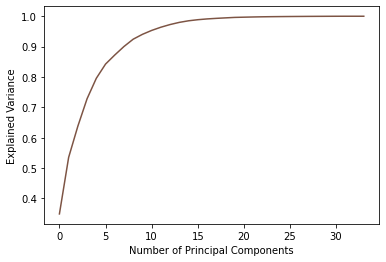

In [57]:
# Explained Variance vs. PC's
pca = PCA()
df2_pca = pca.fit_transform(pc_df)
exp_variances = pca.explained_variance_ratio_.cumsum()

# Plot explained variance
plt.plot(exp_variances, '#7d5444');
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance');

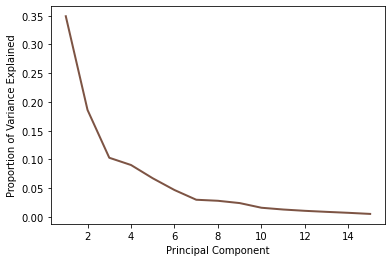

In [58]:
# scree plot
pca = PCA(n_components=15)
p_components = pca.fit_transform(pc_df)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, '#7d5444', linewidth=2)
# plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [61]:
# get explained variance for PC's 2-10
for i in range(2, 11):
    pca = PCA(n_components=i)
    pca.fit_transform(pc_df)
    print(f'PC:{i} EV: {sum(pca.explained_variance_ratio_)}')

PC:2 EV: 0.5352211013435644
PC:3 EV: 0.6381408926106698
PC:4 EV: 0.728459062435412
PC:5 EV: 0.7956793790991751
PC:6 EV: 0.842457009289861
PC:7 EV: 0.8723347935186052
PC:8 EV: 0.9004034886810949
PC:9 EV: 0.9244695468511708
PC:10 EV: 0.9404152342800283


#### Choose PC = 7

In [62]:
pca = PCA(n_components=7)
p_components = pca.fit_transform(pc_df)
p7_df = pd.DataFrame(data = p_components,
                    columns = ['pc_1', 'pc_2', 'pc_3', 'pc_4',
                               'pc_5', 'pc_6', 'pc_7'], index=df.index)
sum(pca.explained_variance_ratio_)

0.8723347935197361

In [63]:
p7_df

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7
0,10.067668,2.980097,2.696590,3.110272,-3.637786,4.571403,1.707187
1,18.570378,5.820725,5.895566,6.070247,-0.747238,6.487275,-0.886524
2,11.720713,2.464295,-0.154195,1.508075,-1.062513,1.842900,0.287472
3,22.481946,5.704134,-6.035803,6.439317,1.988351,-2.548264,4.249299
4,5.014885,0.179507,1.210721,-0.861833,-1.855149,1.320586,-0.921019
...,...,...,...,...,...,...,...
2039,-2.484423,1.797826,2.095352,-0.106982,6.449130,1.112014,0.889015
2040,-3.333299,2.469391,-1.222139,1.134824,3.708433,2.297601,0.409520
2041,-3.305714,2.329479,-1.201353,1.195634,3.694176,2.302203,0.413759
2042,-3.357597,2.430986,-1.218542,1.135528,3.738860,2.291784,0.383489


### Compute Distances

In [119]:
from sklearn.metrics import pairwise_distances

In [120]:
# Compute pairwise distances
dist = pairwise_distances(p7_df, metric='cosine')
dist.shape

(2044, 2044)

In [121]:
# Create distances dataframe
dist = pd.DataFrame(data=dist, index=df.index, columns=df.index)
dist.iloc[:5, :5]

name,supercrack (aka crack attack),roadside attraction,autumn,27 years of climbing,arachnid
name,,,,,
supercrack (aka crack attack),0.000000,0.052050,0.093799,0.276184,0.152092
roadside attraction,0.052050,0.000000,0.072411,0.233394,0.168275
autumn,0.093799,0.072411,0.000000,0.092034,0.127181
27 years of climbing,0.276184,0.233394,0.092034,0.000000,0.387123
arachnid,0.152092,0.168275,0.127181,0.387123,0.000000


### Top Ten Most Similar Routes Based on Route Statistics

In [145]:
def get_recs(route, n_recs):
    """
    Return n_recs most similar routes. If route not listed, 
    return popular routes
    """
    if route in dist.index:
        rt_dist = dist[route].sort_values(ascending=True)
        for rt in rt_dist[1:n_recs+1].index:
            print(rt)
    else:
        for route in q_routes[:n_recs+1].index:
            print(route)

#### Get recommendations for Roadside Attraction route

In [146]:
get_recs('roadside attraction', 10)

bedtime for bonzo
supercrack (aka crack attack)
cheaper than a movie
autumn
party time
the underling
eureka
shock and awe
face up to that crack
inhibitor


## Text Based Recommender
### Text Preprocessing

In [85]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'ner'])
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
df_txt = df.copy()
df_txt

,park,wall,grade_score,style,route_length,num_pitches,num_ratings,rating,share_date,month_views,photos,comments,desc_len,loc_len,prot_len,num_ticks,desc,loc,prot,area
name,,,,,,,,,,,,,,,,,,,,
supercrack (aka crack attack),northern gorge,indian creek,9.0,trad,5.0,1,150.0,3.8,2009.0,150.0,12,21.0,344.0,139.0,159.0,300,scramble up to the ledge where this beautiful ...,walk towards the fibrulator and pass it stayin...,multiple camming units in the hand size and a ...,red river gorge
roadside attraction,natural bridge…,graining fork nature…,7.0,trad,20.0,2,406.0,3.7,2006.0,221.0,30,26.0,425.0,163.0,402.0,917,climbers must not climb at gfnp without a d...,a beautiful dihedral crack scramble to a led...,this crack protects extremely well doubles in...,red river gorge
autumn,northern gorge,long wall,9.0,trad,20.0,1,455.0,3.7,2006.0,102.0,13,16.0,476.0,387.0,69.0,979,climb up the tan and orange rock perhaps the ...,walk right from the approach trail along the w...,gear to 3 5 with doubles in the hand sizes if...,red river gorge
27 years of climbing,pendergrass-mur…,gallery,8.0,sport,20.0,1,1074.0,3.5,2008.0,210.0,13,20.0,75.0,19.0,19.0,3487,great spicy climb for the beginning leader hu...,left side of corner,7 bolts and anchors,red river gorge
arachnid,northern gorge,tower rock,8.0,trad,20.0,1,127.0,3.7,2006.0,39.0,9,7.0,755.0,209.0,310.0,262,don t be overly intimidated by this route oh ...,this route is located on the east face of towe...,hand sized and bigger the lower crack works b...,red river gorge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
double stuff,muir valley,"great arch, the",18.0,sport,200.0,2,2.0,1.0,2011.0,5.0,0,0.0,42.0,30.0,17.0,2,the first pitch has some long hard moves,on the left side of great arch,bolts and anchors,red river gorge
pimpto-bismol,pendergrass-mur…,getaway,19.0,sport,200.0,1,1.0,1.0,2020.0,14.0,0,0.0,57.0,30.0,19.0,1,left most of the group of 4 routes that start ...,15 feet right of og pimp juice,9 bolts and anchors,red river gorge
hookah,bald rock fork…,chocolate factory,18.0,sport,200.0,1,1.0,1.0,2020.0,14.0,0,0.0,257.0,68.0,24.0,3,this route shares the start with malice before...,shares the first few bolts with malice before ...,8 bolts to bolted anchor,red river gorge


In [79]:
# remove nulls and combine text columns into one
df_txt['text'] = df_txt.fillna('').iloc[:, -4:-1].sum(axis=1)

In [80]:
# drop original text columns
df_txt = df_txt.drop(['desc', 'prot', 'loc'], axis=1)

In [81]:
df_txt

,park,wall,grade_score,style,route_length,num_pitches,num_ratings,rating,share_date,month_views,photos,comments,desc_len,loc_len,prot_len,num_ticks,area,text
name,,,,,,,,,,,,,,,,,,
supercrack (aka crack attack),northern gorge,indian creek,9.0,trad,5.0,1,150.0,3.8,2009.0,150.0,12,21.0,344.0,139.0,159.0,300,red river gorge,scramble up to the ledge where this beautiful ...
roadside attraction,natural bridge…,graining fork nature…,7.0,trad,20.0,2,406.0,3.7,2006.0,221.0,30,26.0,425.0,163.0,402.0,917,red river gorge,climbers must not climb at gfnp without a d...
autumn,northern gorge,long wall,9.0,trad,20.0,1,455.0,3.7,2006.0,102.0,13,16.0,476.0,387.0,69.0,979,red river gorge,climb up the tan and orange rock perhaps the ...
27 years of climbing,pendergrass-mur…,gallery,8.0,sport,20.0,1,1074.0,3.5,2008.0,210.0,13,20.0,75.0,19.0,19.0,3487,red river gorge,great spicy climb for the beginning leader hu...
arachnid,northern gorge,tower rock,8.0,trad,20.0,1,127.0,3.7,2006.0,39.0,9,7.0,755.0,209.0,310.0,262,red river gorge,don t be overly intimidated by this route oh ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
double stuff,muir valley,"great arch, the",18.0,sport,200.0,2,2.0,1.0,2011.0,5.0,0,0.0,42.0,30.0,17.0,2,red river gorge,the first pitch has some long hard moves on t...
pimpto-bismol,pendergrass-mur…,getaway,19.0,sport,200.0,1,1.0,1.0,2020.0,14.0,0,0.0,57.0,30.0,19.0,1,red river gorge,left most of the group of 4 routes that start ...
hookah,bald rock fork…,chocolate factory,18.0,sport,200.0,1,1.0,1.0,2020.0,14.0,0,0.0,257.0,68.0,24.0,3,red river gorge,this route shares the start with malice before...


In [83]:
# add words to spacy's stop words list
STOP_WORDS |= {'climb', 'climbers', 'climber', 'climbed', 'climbs',
               'climbing', 'route', 'routes'}

In [84]:
def lemmatize(text):
    """Remove stopwords and lemmatize text"""
    doc = nlp(text)
    lemma_list = [str(token.lemma_).lower() for token in doc
                  if token.text.lower() not in STOP_WORDS]
    return lemma_list

#### TF-IDF

In [86]:
# Instantiate tfidf vectorizer
tfidf_vector = TfidfVectorizer(tokenizer=lemmatize, min_df=2)

In [87]:
X = tfidf_vector.fit_transform(df_txt['text'])

/opt/anaconda3/envs/metis2/lib/python3.8/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [88]:
# Create dataframe from tfidf vectors
tf_df = pd.DataFrame.sparse.from_spmatrix(X, index=df.index, 
                                          columns=tfidf_vector.get_feature_names_out())

In [89]:
tf_df

,,,,,,,,,,,...,zoo,zookeeper,,,,,°,“,”,…
name,,,,,,,,,,,,,,,,,,,,,
supercrack (aka crack attack),0.155299,0.089960,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
roadside attraction,0.269634,0.066939,0.115598,0.049655,0.071536,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
autumn,0.312544,0.072419,0.062531,0.053720,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27 years of climbing,0.085081,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arachnid,0.294247,0.000000,0.000000,0.044625,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
double stuff,0.133772,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pimpto-bismol,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hookah,0.068974,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.196815,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Apply PCA to Text Data

In [93]:
print(type(tf_df))

<class 'pandas.core.frame.DataFrame'>


In [95]:
# create dense dataframe
dense_tf = tf_df.sparse.to_dense()

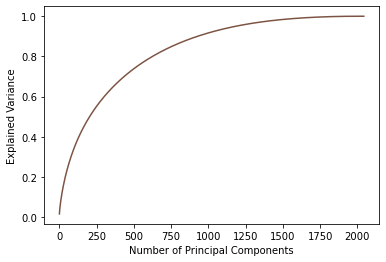

In [97]:
pca = PCA()
df2_pca = pca.fit_transform(dense_tf)
exp_variances = pca.explained_variance_ratio_.cumsum()

# Plot explained variance
plt.plot(exp_variances, '#7d5444');
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance');

In [99]:
for i in range(700, 1000, 20):
    pca = PCA(n_components=i)
    pca.fit_transform(dense_tf)
    print(f'PC:{i} EV: {sum(pca.explained_variance_ratio_)}')

PC:700 EV: 0.8267059295170671
PC:720 EV: 0.8342355963793004
PC:740 EV: 0.8414789865272785
PC:760 EV: 0.848394581622721
PC:780 EV: 0.8551666130790909
PC:800 EV: 0.8616153232834143
PC:820 EV: 0.8678910206503855
PC:840 EV: 0.8739017552321608
PC:860 EV: 0.879711625208879
PC:880 EV: 0.8853239104403267
PC:900 EV: 0.8907222710320659
PC:920 EV: 0.8959249058754176
PC:940 EV: 0.9008896062788072
PC:960 EV: 0.9057155997011115
PC:980 EV: 0.9103963385193073


In [104]:
# Choose 700 PCs
pca = PCA(n_components=700)
pc = pca.fit_transform(dense_tf)
p700_df = pd.DataFrame(data=pc, index=df.index)
sum(pca.explained_variance_ratio_)

0.8267962497650083

In [105]:
p700_df.shape

(2044, 700)

### Compute Distances

In [106]:
dist = pairwise_distances(p700_df, metric='cosine')
dist.shape

(2044, 2044)

In [107]:
dist = pd.DataFrame(data=dist, index=df.index, columns=df.index)

In [108]:
dist.iloc[:5, :5]

name,supercrack (aka crack attack),roadside attraction,autumn,27 years of climbing,arachnid
name,,,,,
supercrack (aka crack attack),2.220446e-16,0.923518,9.606160e-01,1.016870,0.848239
roadside attraction,9.235176e-01,0.000000,9.689735e-01,1.033236,0.918085
autumn,9.606160e-01,0.968973,1.443290e-15,1.057433,0.946876
27 years of climbing,1.016870e+00,1.033236,1.057433e+00,0.000000,0.995371
arachnid,8.482386e-01,0.918085,9.468757e-01,0.995371,0.000000


### Find 10 most similar routes based on text data

In [109]:
rt_dist = dist["roadside attraction"].sort_values(ascending=True)

In [110]:
# 10 most similar routes based on text data to roadside attraction
rt_dist[1:11]

name
trouble clef                      0.259980
wicked games                      0.292316
scissors                          0.297722
gumby land                        0.299974
i didn't know this was the end    0.310585
kampsight                         0.317813
altered scale                     0.324232
c sharp or b flat                 0.329374
all cows eat grass                0.331328
mantel route                      0.337736
Name: roadside attraction, dtype: float64